# Sigutils Plotting Examples

In [7]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
import sigutils

Here is a basic Bode plot using `scipy.signal` to generate the transfer function.

(<matplotlib.figure.Figure at 0x10bbd84d0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x109ed8410>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10dcb7b90>))

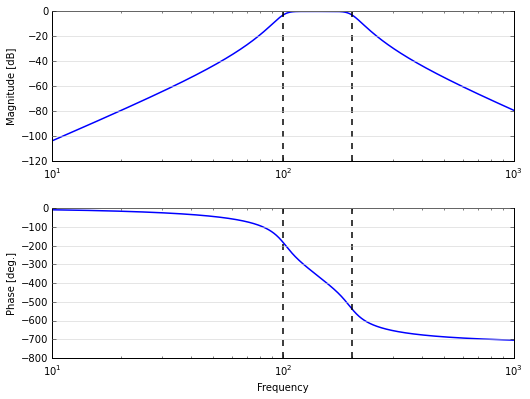

In [8]:
sigutils.bode_sys(signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass'), xlim=(10, 1000), gain_point=-3)

Here is a plot using `bode_syss` to plot multiple transfer functions on the same graph.

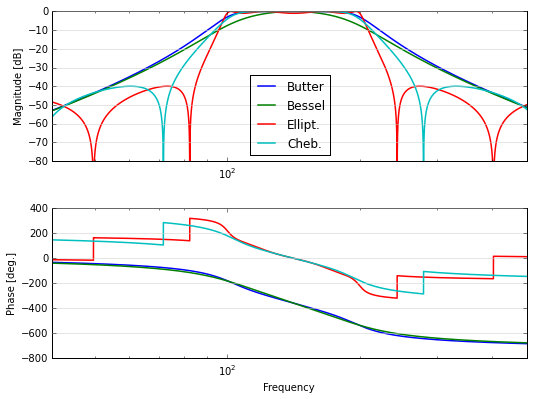

In [9]:
butter = signal.butter(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
bessel = signal.bessel(4, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
ellip  =  signal.ellip(4, 1, 40, [100*2*np.pi, 200*2*np.pi], analog=True, btype='bandpass')
cheb2  = signal.cheby2(4, 40, [100*2*np.pi*0.75, 200*2*np.pi/0.75], analog=True, btype='bandpass')
fig, (ax1, ax2) = sigutils.bode_syss((butter, bessel, ellip, cheb2), xlim=(40, 480), mag_lim=(-80, 0, 10),)
ax1.legend(['Butter', 'Bessel', 'Ellipt.', 'Cheb.'], loc='lower center')

Quickly compare different filter parameters using `bode_firs`.

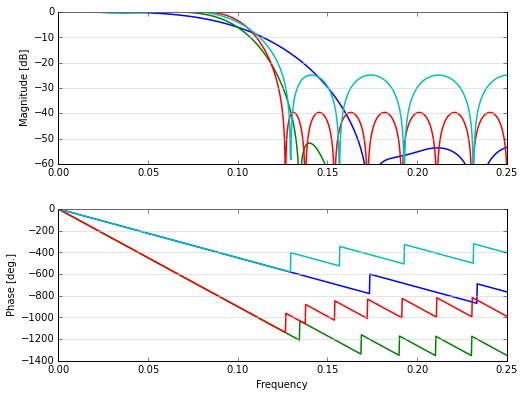

In [10]:
fig, (ax1, ax2) = sigutils.bode_firs((signal.firwin(51, 0.1, nyq=1),
                                     signal.firwin(101, 0.1, nyq=1),
                                     signal.remez(101, [0, 0.085, 0.125, 1], [1, 0], Hz=2),
                                     signal.remez(51, [0, 0.085, 0.125, 1], [1, 0], Hz=2)),
                                     xlim=(0, 0.25), mag_lim=(-60, 0, 10))

Plot analog and digital filters together on the same (analog) frequency axis, useful for evaluating digital approximations to analog filters.

ValueError: Digital system ((array([-1.00000011, -0.99999989]), array([ 0.58413033+0.2879409j,  0.58413033-0.2879409j]), 0.063964384855587975)) has more than two elements.

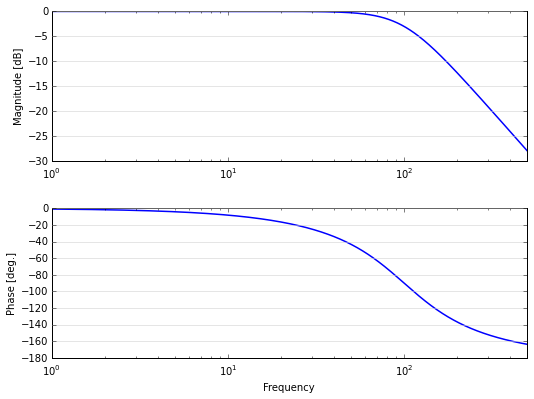

In [18]:
butt = signal.butter(2, 2*np.pi*100, analog=True, output='zpk')
butt_z = signal.cont2discrete(butt, 1./1000., method='bilinear')[:-1]
sigutils.bode_an_dig((butt,), (butt_z,), 1000, xlog=True, xlim=(1, 500))

(array([-1.00000011, -0.99999989]),
 array([ 0.58413033+0.2879409j,  0.58413033-0.2879409j]),
 0.063964384855587975)